<a href="https://colab.research.google.com/github/ysk8448/Private-Study/blob/main/bike_sharing_demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datas/bike-sharing-demand/bike_sharing_train.csv')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


# 기술통계

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

# 전처리

In [ ]:
#날짜 데이터 연,월,일,시간으로 분리하기
df['datetime'] = df.datetime.apply(pd.to_datetime)
df['year'] = df.datetime.apply(lambda x:x.year)
df['month'] = df.datetime.apply(lambda x:x.month)
df['day'] = df.datetime.apply(lambda x:x.day)
df['hour'] = df.datetime.apply(lambda x:x.hour)
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22


In [ ]:
#불필요한 열 삭제
#통합 날짜 열 삭제
#casual(사전미등록)+registered(사전등록) = count

drop_col = ['datetime','casual','registered']
df = df.drop(drop_col, axis=1)
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0000,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0000,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0000,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,336,2012,12,19,19
10882,4,0,1,1,14.76,17.425,57,15.0013,241,2012,12,19,20
10883,4,0,1,1,13.94,15.910,61,15.0013,168,2012,12,19,21
10884,4,0,1,1,13.94,17.425,61,6.0032,129,2012,12,19,22


X 변수 그래프 그리기

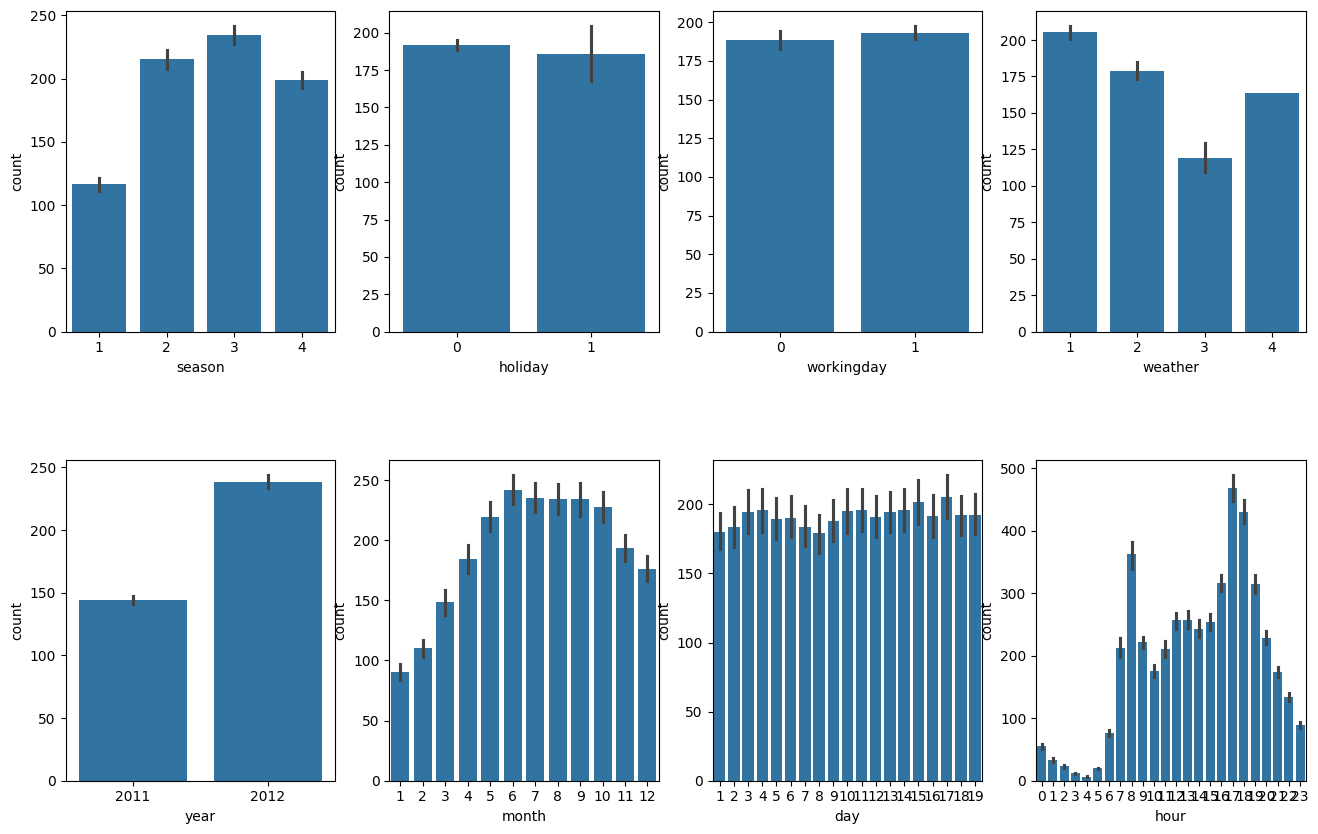

In [ ]:
fig, axs = plt.subplots(figsize=(16,10), nrows=2, ncols=4)
plot_features = ['season','holiday','workingday','weather','year','month','day','hour']

for i, feature in enumerate(plot_features):
  row=int(i/4)
  col=i%4
  sns.barplot(x=feature, y='count', data=df, ax= axs[row][col])

#그래프간 상하 간격 조절
plt.subplots_adjust(hspace=0.4)
plt.show()



1.   2011보다 2012가 더 많이 대여.
2.   겨울시즌에 줄고, 여름시즌에 많이 탄다.
1.   출퇴근시간대에 대여량이 많다.
2.   항목 추가





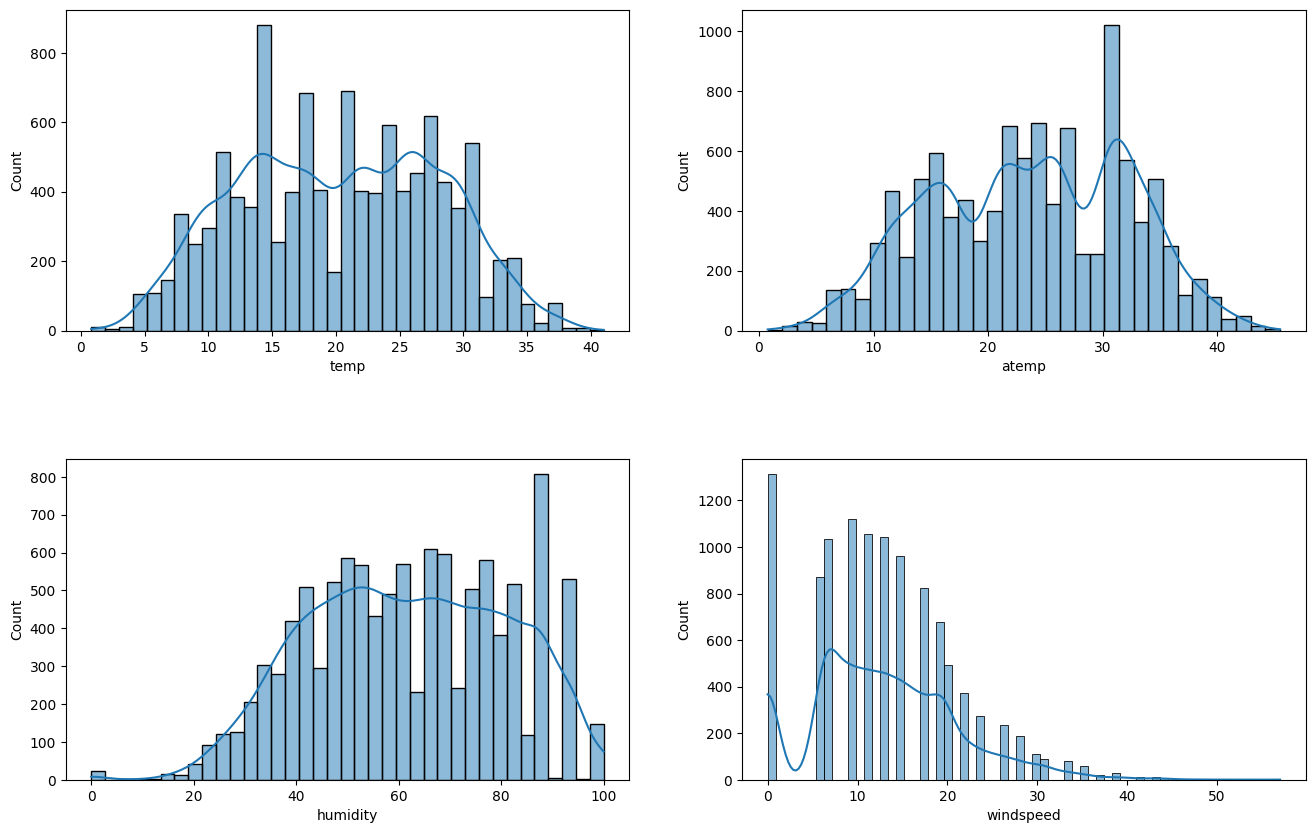

In [ ]:
fig, axs = plt.subplots(figsize=(16,10), nrows=2, ncols=2)
plot_columns = ['temp','atemp', 'humidity',	'windspeed']
for i,col in enumerate(plot_columns):
  row_idx = int(i/2)
  col_idx = i%2
  sns.histplot(df[col], kde=True, ax=axs[row_idx][col_idx])

#그래프간 상하 간격 조절
plt.subplots_adjust(hspace=0.4)
plt.show()

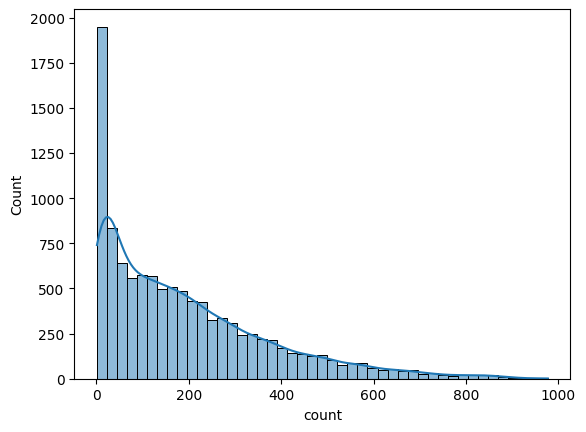

In [ ]:
#y변수
sns.histplot(df['count'], kde=True)
plt.show()

회귀모델의 기본가정인 X,y의 정규성이 왜곡된다.

# 1차 OLS
: 아무런 처리를 하지 않고 선형회귀모델을 돌려보다.

In [ ]:
def rmsle(y,pred):
  log_y = np.log1p(y)
  log_pred = np.log1p(pred)
  squared_error = (log_y - log_pred)**2
  rmsle = np.sqrt(np.mean(squared_error))
  return rmsle

def rmse(y,pred):
  return np.sqrt(mean_squared_error(y,pred))

def eval_regression(y,pred):
  rmsle_val = rmsle(y,pred)
  rmse_val = rmse(y,pred)
  mae_val = mean_absolute_error(y,pred)
  #r2_val = r2_score(y,pred)

  print(f'RMSLE: {rmsle_val:.3F}, RMSE: {rmse_val:.3F}, MAE: {mae_val:.3F}')

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso


y = df['count']
X = df.drop('count',axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

lr = LinearRegression()
#ridge = Ridge(alpha=10)
#lasso = Lasso(alpha=0.01)

lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print("학습 데이터 점수: {}".format(lr.score(X_train, y_train)))
print("테스트 데이터 점수: {}".format(lr.score(X_test, y_test)))

(8708, 12) (8708,)
(2178, 12) (2178,)
학습 데이터 점수: 0.3884929923899946
테스트 데이터 점수: 0.3917357958499781


In [ ]:
eval_regression(y_test, lr_pred)

RMSLE: 1.211, RMSE: 144.316, MAE: 107.550




1.   데이터에 아무런 처리를 하지않고 돌린 OLS의 평가지표는 다음과 같다.
2.   RMSLE 1.211
2.   RMSE 144.316
1.   MAE 107.55
2.   #R2 score







y변수 로그변환 후 그래프 확인

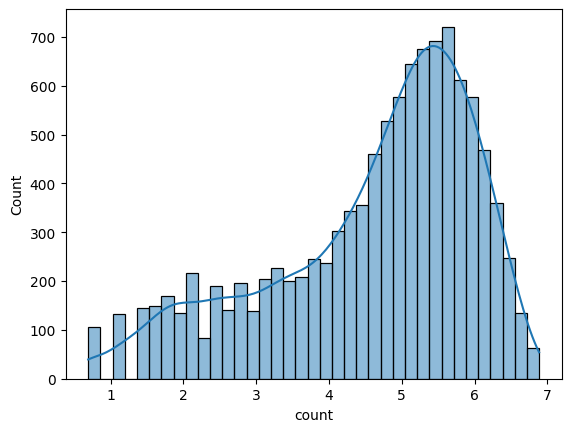

In [ ]:
y_log = np.log1p(df['count'])
sns.histplot(y_log, kde=True)
plt.show()

# 2차 OLS : y를 로그변환 후

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=10)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

lr = LinearRegression()
#ridge = Ridge(alpha=10)
#lasso = Lasso(alpha=0.01)

lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

### 로그변환된 y값을 지수 expm1를 취해 다시 원래 값으로 되돌림 ###
y_test_exp = np.expm1(y_test)
lr_pred_exp = np.expm1(lr_pred)

eval_regression(y_test_exp, lr_pred_exp)
print("학습 데이터 점수: {}".format(lr.score(X_train, y_train)))
print("테스트 데이터 점수: {}".format(lr.score(X_test, y_test)))

(8708, 12) (8708,)
(2178, 12) (2178,)
RMSLE: 1.040, RMSE: 162.988, MAE: 107.868
학습 데이터 점수: 0.4865745805873456
테스트 데이터 점수: 0.4892362499652263



정확도는 증가했지만, RMSE 값도 함께 증가함

1.   RMSLE 1.211 -> 1.04
2.   RMSE 144.316 -> 162.988
1.   MAE 107.55 ->107.868
2.   #R2 score



<Axes: ylabel='None'>

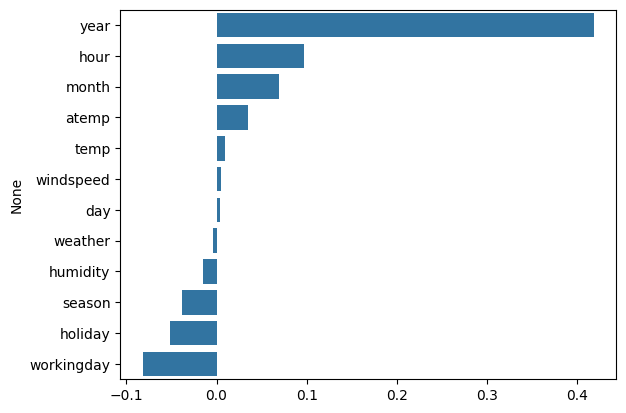

In [ ]:
coef = pd.Series(lr.coef_, index=X.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values, y=coef_sort.index)


1.   연도변수가 주요하지만,
2.   year, month, hour는 명목형(categorical)변수인데, 선형회귀는 이를 숫자로 인식한다.

<<데이터 변수의 처리>>
1.   X변수에서 정규분포를 띠지 않는 변수들을 로그변환시켜 정규분포에 최대한 가깝게 만들어준다.
2.   X변수에서 명목형 변수를 원 핫 인코딩 시킨다.






1. X변수 중  정규분포를 띠지 않는 변수들을 로그변환 -> 'temp','atemp', 'humidity',	'windspeed' 로그변환

In [ ]:
plot_y_columns = ['temp','atemp', 'humidity',	'windspeed','count']
for col in plot_y_columns:
  df[col] = np.log1p(df[col])
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,2.383243,2.734043,4.406719,0.000000,2.833213,2011,1,1,0
1,1,0,0,1,2.304583,2.683416,4.394449,0.000000,3.713572,2011,1,1,1
2,1,0,0,1,2.304583,2.683416,4.394449,0.000000,3.496508,2011,1,1,2
3,1,0,0,1,2.383243,2.734043,4.330733,0.000000,2.639057,2011,1,1,3
4,1,0,0,1,2.383243,2.734043,4.330733,0.000000,0.693147,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,2.808197,3.029892,3.931826,3.295937,5.820083,2012,12,19,19
10882,4,0,1,1,2.757475,2.913708,4.060443,2.772670,5.488938,2012,12,19,20
10883,4,0,1,1,2.704042,2.827905,4.127134,2.772670,5.129899,2012,12,19,21
10884,4,0,1,1,2.704042,2.913708,4.127134,1.946367,4.867534,2012,12,19,22


그래프 확인

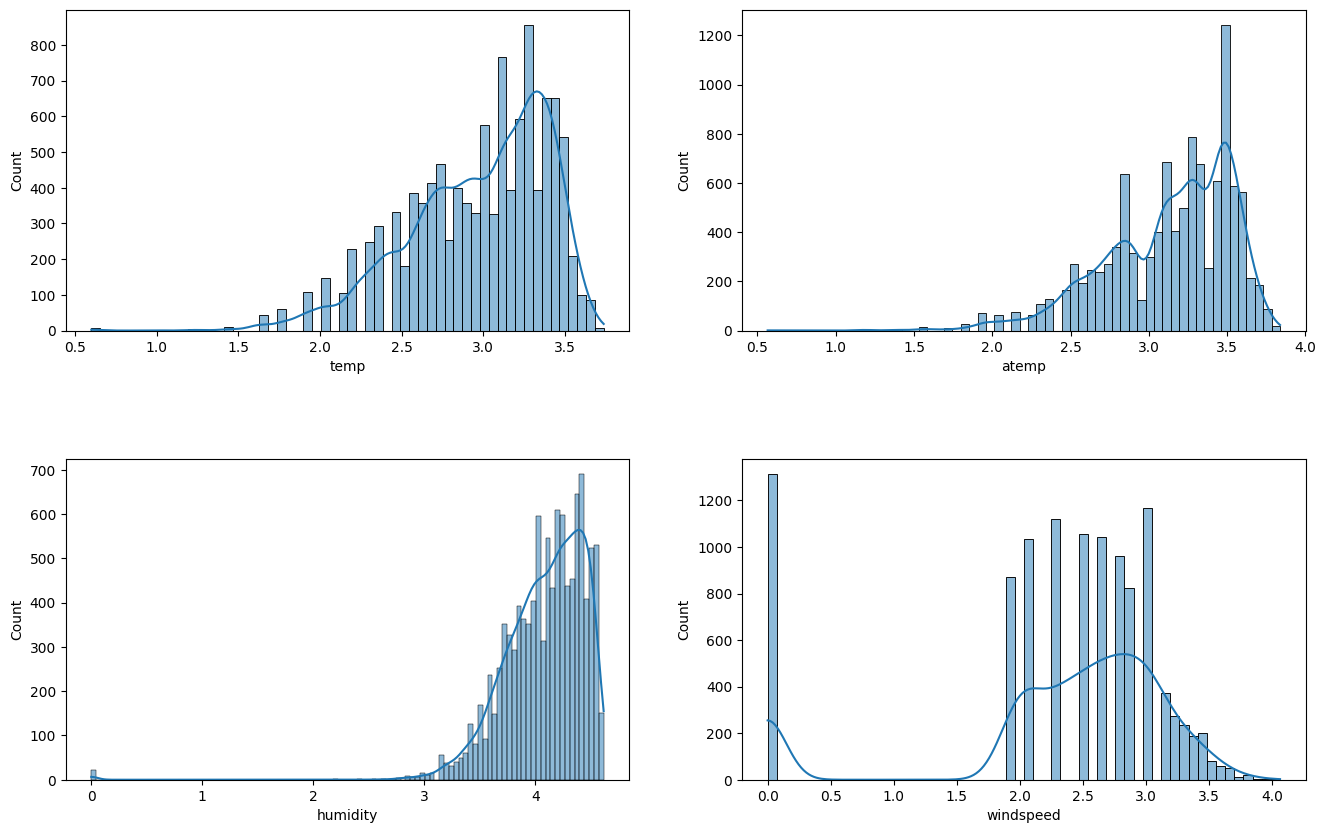

In [ ]:
fig, axs = plt.subplots(figsize=(16,10), nrows=2, ncols=2)
for i,col in enumerate(plot_columns):
  row_idx = int(i/2)
  col_idx = i%2
  sns.histplot(df[col], kde=True, ax=axs[row_idx][col_idx])

#그래프간 상하 간격 조절
plt.subplots_adjust(hspace=0.4)
plt.show()

정규분포 모양인지 여전히 의심스럽지만,처음보다 왜곡도가 많이 줄었다.

2.X변수에서 명목형 변수를 원 핫 인코딩 -> 범주형변수 (year, month, day, hour, holiday, workingday, season, weather)원 핫 인코딩


1.   pd.getDummies()를 쓸 수도 있지만, (정확도)를 위해 원핫 인코딩으로 진행했다.




In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
df_ohe = ohe.fit_transform(df[['year','month','day','hour','holiday','workingday','season','weather']])
df_ohe = pd.DataFrame(df_ohe, columns=ohe.get_feature_names_out())
df_ohe

,year_2011,year_2012,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,...,workingday_0,workingday_1,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
10882,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
10883,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
10884,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


원 핫 인코딩한 변수 데이터 합치기 및 y(count)변수 로그변환

In [ ]:
df = pd.concat([df, df_ohe], axis=1)
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,...,workingday_0,workingday_1,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,1,0,0,1,2.383243,2.734043,4.406719,0.000000,2.833213,2011,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,0,0,1,2.304583,2.683416,4.394449,0.000000,3.713572,2011,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,0,0,1,2.304583,2.683416,4.394449,0.000000,3.496508,2011,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,0,0,1,2.383243,2.734043,4.330733,0.000000,2.639057,2011,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1,0,0,1,2.383243,2.734043,4.330733,0.000000,0.693147,2011,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,2.808197,3.029892,3.931826,3.295937,5.820083,2012,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
10882,4,0,1,1,2.757475,2.913708,4.060443,2.772670,5.488938,2012,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
10883,4,0,1,1,2.704042,2.827905,4.127134,2.772670,5.129899,2012,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
10884,4,0,1,1,2.704042,2.913708,4.127134,1.946367,4.867534,2012,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
df.drop(['year','month','day','hour','holiday','workingday','season','weather'], axis=1, inplace=True)
df

,temp,atemp,humidity,windspeed,count,year_2011,year_2012,month_1,month_2,month_3,...,workingday_0,workingday_1,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2.383243,2.734043,4.406719,0.000000,2.833213,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2.304583,2.683416,4.394449,0.000000,3.713572,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2.304583,2.683416,4.394449,0.000000,3.496508,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2.383243,2.734043,4.330733,0.000000,2.639057,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2.383243,2.734043,4.330733,0.000000,0.693147,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2.808197,3.029892,3.931826,3.295937,5.820083,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
10882,2.757475,2.913708,4.060443,2.772670,5.488938,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
10883,2.704042,2.827905,4.127134,2.772670,5.129899,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
10884,2.704042,2.913708,4.127134,1.946367,4.867534,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


모델링

OLS, RIDGE, LASSO,ELASTICNET

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

lr = LinearRegression()
ridge = Ridge(alpha=10)
lasso = Lasso(alpha=0.01)
elasticnet = ElasticNet(alpha=0.01)

y_log = df['count']
#y_log = np.log1p(df['count'])
X = df.drop('count',axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=10)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8708, 73), (2178, 73), (8708,), (2178,))

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

rf = RandomForestRegressor(random_state=500)
gbr = GradientBoostingRegressor(random_state=500)
xgb = XGBRegressor(random_state=500)
lgbm = LGBMRegressor(random_state=500)

models = {
    "LinearRegression":lr,
    "Ridge":ridge,
    "Lasso":lasso,
    "ElasticNet":elasticnet,
    "RandomForestRegressor": rf,
    "GradientBoostingRegressor": gbr,
    "XGBRegressor": xgb,
    "LightGBMRegressor": lgbm
}

for name, model in models.items():
  model.fit(X_train, y_train)
  pred = model.predict(X_test)

  y_test_exp = np.expm1(y_test)
  pred_exp = np.expm1(pred)

  print(f"{name} exp transformed:")
  print(eval_regression(y_test_exp, pred_exp))

  print(f"{name} exp non-transformed:")
  print(eval_regression(y_test, pred))


# lr.fit(X_train, y_train)
# lr_pred = lr.predict(X_test)

# y_test_exp = np.expm1(y_test)
# lr_pred_exp = np.expm1(lr_pred)

# print(eval_regression(y_test_exp, lr_pred_exp))
# print(eval_regression(y_test, lr_pred))



LinearRegression exp transformed:
RMSLE: 0.575, RMSE: 95.555, MAE: 61.726
None
LinearRegression exp non-transformed:
RMSLE: 0.139, RMSE: 0.575, MAE: 0.435
None
Ridge exp transformed:
RMSLE: 0.578, RMSE: 96.649, MAE: 62.274
None
Ridge exp non-transformed:
RMSLE: 0.140, RMSE: 0.578, MAE: 0.438
None
Lasso exp transformed:
RMSLE: 0.633, RMSE: 112.896, MAE: 70.765
None
Lasso exp non-transformed:
RMSLE: 0.153, RMSE: 0.633, MAE: 0.488
None
ElasticNet exp transformed:
RMSLE: 0.639, RMSE: 110.407, MAE: 68.954
None
ElasticNet exp non-transformed:
RMSLE: 0.157, RMSE: 0.639, MAE: 0.489
None
RandomForestRegressor exp transformed:
RMSLE: 0.350, RMSE: 48.232, MAE: 29.204
None
RandomForestRegressor exp non-transformed:
RMSLE: 0.092, RMSE: 0.350, MAE: 0.238
None
GradientBoostingRegressor exp transformed:
RMSLE: 0.490, RMSE: 95.793, MAE: 59.824
None
GradientBoostingRegressor exp non-transformed:
RMSLE: 0.116, RMSE: 0.490, MAE: 0.376
None
XGBRegressor exp transformed:
RMSLE: 0.332, RMSE: 51.031, MAE: 30.

In [ ]:
#print("학습 데이터 점수: {}".format(lr.score(X_train, y_train)))
#print("테스트 데이터 점수: {}".format(lr.score(X_test, y_test)))

변수 중요도 출력

In [ ]:
def model_predict(model, X_train,X_test, y_train, y_test, is_expm1=False):
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  if is_expm1:
    y_test = np.expm1(y_test)
    pred = np.expm1(pred)
  print('###',model.__class__.__name__,'###')
  eval_regression(y_test,pred)

In [ ]:
for name,model in models.items():
  model_predict(model, X_train,X_test, y_train, y_test, is_expm1=True)

### LinearRegression ###
RMSLE: 0.575, RMSE: 95.555, MAE: 61.726
### Ridge ###
RMSLE: 0.578, RMSE: 96.649, MAE: 62.274
### Lasso ###
RMSLE: 0.633, RMSE: 112.896, MAE: 70.765
### ElasticNet ###
RMSLE: 0.639, RMSE: 110.407, MAE: 68.954
### RandomForestRegressor ###
RMSLE: 0.350, RMSE: 48.232, MAE: 29.204
### GradientBoostingRegressor ###
RMSLE: 0.490, RMSE: 95.793, MAE: 59.824
### XGBRegressor ###
RMSLE: 0.332, RMSE: 51.031, MAE: 30.854
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000589 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 349
[LightGBM] [Info] Number of data points in the train set: 8708, number of used features: 72
[LightGBM] [Info] Start training from score 4.598968
### LGBMRegressor ###
RMSLE: 0.331, RMSE: 49.613, MAE: 30.281


그래프 시각화